In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
pd.set_option('display.max_rows', 500)
pd.set_option('display.show_dimensions', True)
%matplotlib inline
plt.style.use('fivethirtyeight')

# Pima Indians Diabetes Database

In [2]:
# Load in the dataset
pima = pd.read_csv('/home/yungshun/workspace/py/sklearn-ml-feature-improvement/datasets/diabetes.csv')
# If missing column names
# pima_column_names = ['times_pregnant', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_thickness', 'serum_insulin', 'bmi', 'pedigree_function', 'age', 'onset_diabetes']
# pima = pd.read_csv('/home/yungshun/workspace/py3/feature-improvement/datasets/diabetes.csv', names=pima_column_names)

In [3]:
pima.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima.shape

(768, 9)

In [5]:
# Another method to check for missing values
pima.isnull().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
Length: 9, dtype: int64

In [6]:
# Get some basic descriptive statistics
pima.describe() 

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Qualitative data

In [7]:
# Get null accuracy, 65% did not develop diabetes
pima['onset_diabetes'].value_counts(normalize=True) 

0    0.651042
1    0.348958
Name: onset_diabetes, Length: 2, dtype: float64

### Quantitative data

In [8]:
# Numerical correlation matrix
# plasma_glucose_concentration definitely seems to be an interesting feature here
pima.corr()['onset_diabetes']

times_pregnant                  0.221898
plasma_glucose_concentration    0.466581
diastolic_blood_pressure        0.065068
triceps_thickness               0.074752
serum_insulin                   0.130548
bmi                             0.292695
pedigree_function               0.173844
age                             0.238356
onset_diabetes                  1.000000
Name: onset_diabetes, Length: 9, dtype: float64

<AxesSubplot: >

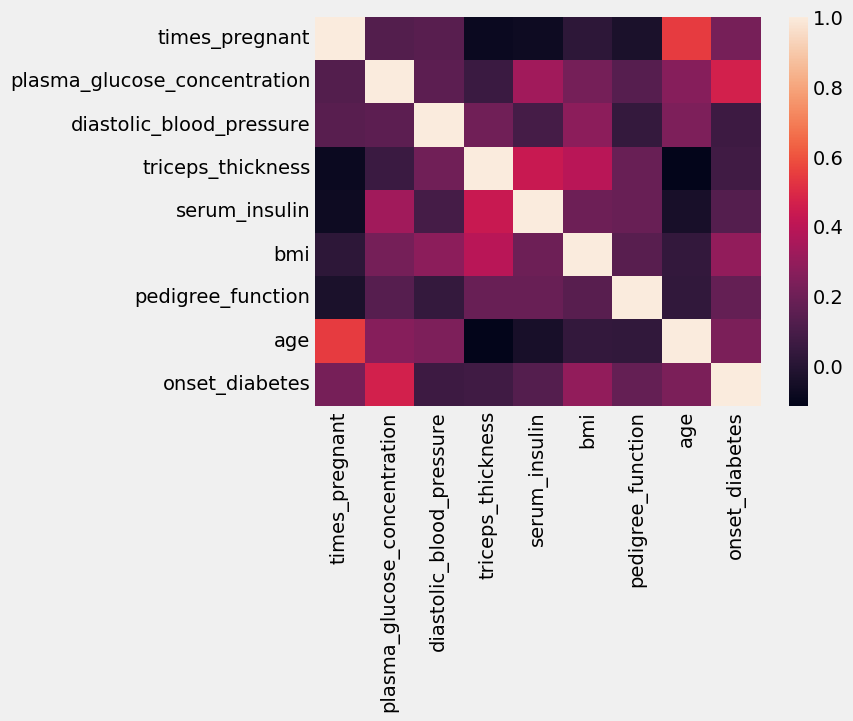

In [9]:
# Look at the heatmap of the correlation matrix of our dataset
sns.heatmap(pima.corr())

### Nominal level

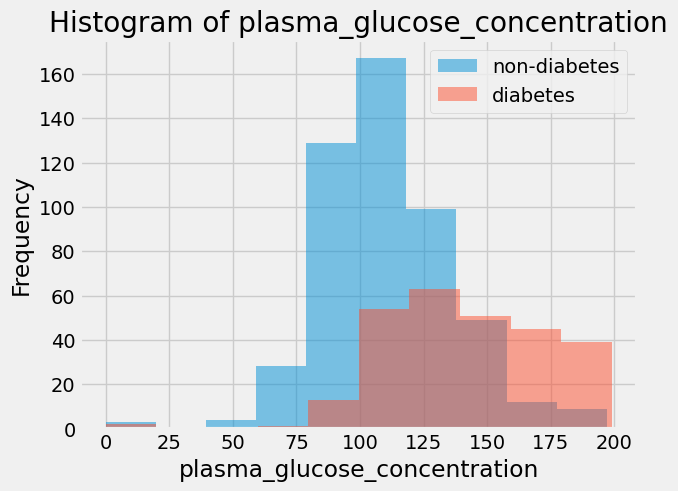

In [10]:
# Get a histogram of the plasma_glucose_concentration column for both classes
col = 'plasma_glucose_concentration'
plt.hist(pima[pima['onset_diabetes']==0][col], 10, alpha=0.5, label='non-diabetes')
plt.hist(pima[pima['onset_diabetes']==1][col], 10, alpha=0.5, label='diabetes')
plt.legend(loc='upper right')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(col))
plt.show()

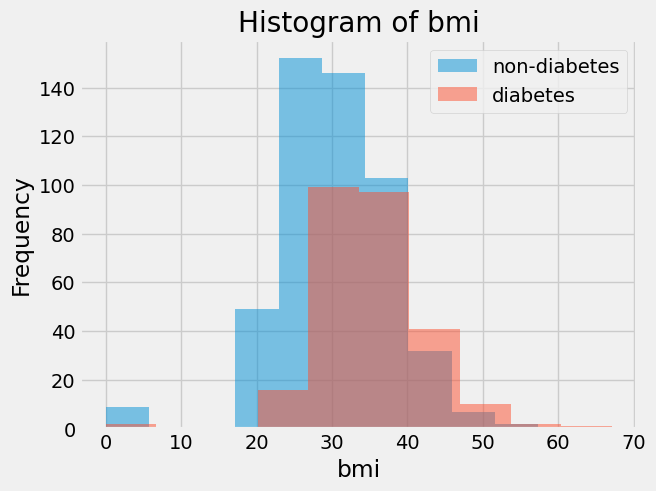

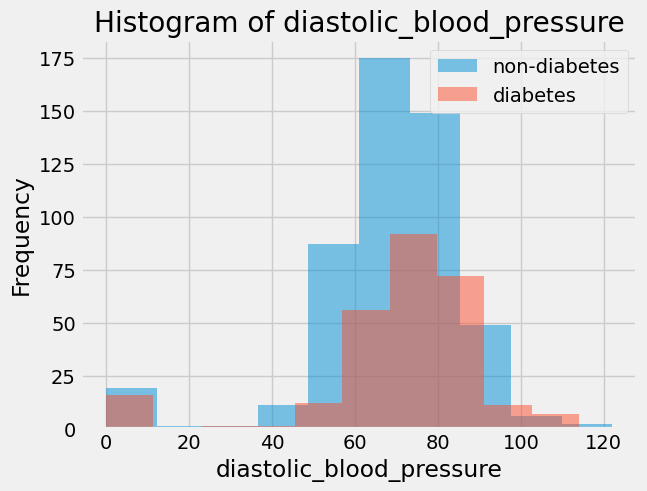

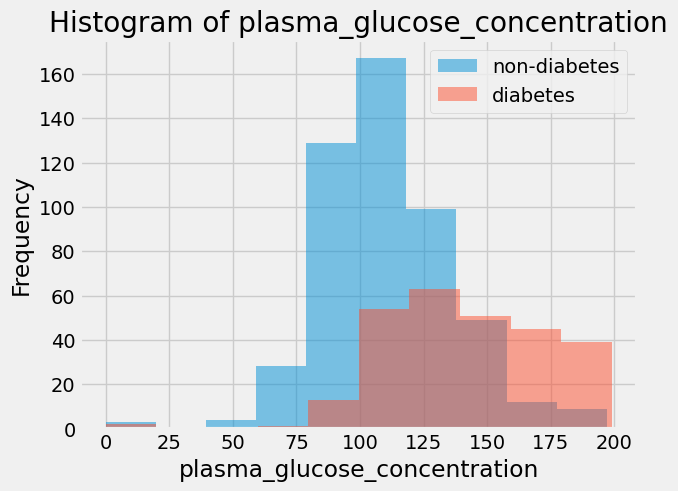

In [11]:
for col in ['bmi', 'diastolic_blood_pressure', 'plasma_glucose_concentration']:
    plt.hist(pima[pima['onset_diabetes']==0][col], 10, alpha=0.5, label='non-diabetes')
    plt.hist(pima[pima['onset_diabetes']==1][col], 10, alpha=0.5, label='diabetes')
    plt.legend(loc='upper right')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Histogram of {}'.format(col))
    plt.show()

## Impute the missing values in data

In [12]:
# Notice that the min value of bmi is 0. That is physically impossible. 
# Perhaps 0 has been encoded as a missing value instead of None

# We see that a 0 appears as a min for 
# times_pregnant
# plasma_glucose_concentration
# diastolic_blood_pressure
# triceps_thickness
# serum_insulin
# bmi
# onset_diabetes

# Because 0 is a class for onset_diabetes and 0 is a viable number for times_pregnant, we may conclude that 0 is encoding missing values for 
# plasma_glucose_concentration
# diastolic_blood_pressure
# triceps_thickness
# serum_insulin
# bmi
pima['serum_insulin'].isnull().sum()

0

In [13]:
pima['serum_insulin'] = pima['serum_insulin'].map(lambda x:x if x != 0 else None)

In [14]:
pima['serum_insulin'].isnull().sum()

374

In [15]:
# For all columns
for col in ['serum_insulin', 'bmi', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_thickness']:
    pima[col].replace([0], [None], inplace=True)

In [16]:
# This makes more sense now
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
Length: 9, dtype: int64

In [17]:
pima.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148,72,35,NaN,33.6,0.627,50,1
1,1,85,66,29,NaN,26.6,0.351,31,0
2,8,183,64,None,NaN,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [18]:
# Doesn't include columns with missing values
pima.describe()

,times_pregnant,serum_insulin,pedigree_function,age,onset_diabetes
count,768.000000,394.000000,768.000000,768.000000,768.000000
mean,3.845052,155.548223,0.471876,33.240885,0.348958
std,3.369578,118.775855,0.331329,11.760232,0.476951
min,0.000000,14.000000,0.078000,21.000000,0.000000
25%,1.000000,76.250000,0.243750,24.000000,0.000000
50%,3.000000,125.000000,0.372500,29.000000,0.000000
75%,6.000000,190.000000,0.626250,41.000000,1.000000
max,17.000000,846.000000,2.420000,81.000000,1.000000


### fillna()

In [19]:
pima['plasma_glucose_concentration'].mean(), pima['plasma_glucose_concentration'].std()

(121.6867627785059, 30.53564107280403)

In [20]:
empty_plasma_index = pima[pima['plasma_glucose_concentration'].isnull()].index
pima.loc[empty_plasma_index]['plasma_glucose_concentration']

75     None
182    None
342    None
349    None
502    None
Name: plasma_glucose_concentration, Length: 5, dtype: object

In [21]:
# Fill the column's missing values with the mean of the rest of the column
pima['plasma_glucose_concentration'].fillna(pima['plasma_glucose_concentration'].mean(), inplace=True)

In [22]:
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      0
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
Length: 9, dtype: int64

In [23]:
pima.loc[empty_plasma_index]['plasma_glucose_concentration']

75     121.686763
182    121.686763
342    121.686763
349    121.686763
502    121.686763
Name: plasma_glucose_concentration, Length: 5, dtype: float64

### SimpleImputer()

`from sklearn.preprocessing import Imputer` was deprecated and removed. Now we use `from sklearn.impute import SimpleImputer` instead.

In [24]:
imputer = SimpleImputer(strategy='mean')

In [25]:
pima_imputed = imputer.fit_transform(pima)

In [26]:
# Comes out as an array
type(pima_imputed)

numpy.ndarray

In [27]:
pima_imputed = pd.DataFrame(pima_imputed, columns=pima.columns)

In [28]:
# Notice for example the triceps_thickness missing values were replaced with 29.15342
pima_imputed.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


In [29]:
# Same values as we obtained with fillna
pima_imputed.loc[empty_plasma_index]['plasma_glucose_concentration']

75     121.686763
182    121.686763
342    121.686763
349    121.686763
502    121.686763
Name: plasma_glucose_concentration, Length: 5, dtype: float64

In [30]:
# No missing values
pima_imputed.isnull().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
Length: 9, dtype: int64

In [31]:
# Average vector length of imputed matrix
np.sqrt((pima_imputed**2).sum(axis=1)).mean()  

223.36222025823747

## Remove harmful rows of data

### dropna()

In [32]:
# Drop the rows with missing values
pima_dropped = pima.dropna()

In [33]:
# Lost over half of the rows
print("retained {}% of rows".format(round(100*(pima.shape[0] - pima_dropped.shape[0])/float(pima.shape[0]))))

retained 49% of rows


In [34]:
pima['onset_diabetes'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: onset_diabetes, Length: 2, dtype: float64

In [35]:
# The split of trues and falses stay relatively the same
pima_dropped['onset_diabetes'].value_counts(normalize=True)

0    0.669211
1    0.330789
Name: onset_diabetes, Length: 2, dtype: float64

In [36]:
# The mean values of each column (with missing values rows dropped)
pima_dropped.mean()

times_pregnant                    3.295165
plasma_glucose_concentration    122.625157
diastolic_blood_pressure         70.671756
triceps_thickness                29.122137
serum_insulin                   155.717557
bmi                              33.072519
pedigree_function                 0.522476
age                              30.839695
onset_diabetes                    0.330789
Length: 9, dtype: float64

In [37]:
# % change in means
(pima_dropped.mean() - pima.mean()) / pima.mean()

times_pregnant                 -0.143012
plasma_glucose_concentration    0.007712
diastolic_blood_pressure       -0.023941
triceps_thickness              -0.001073
serum_insulin                   0.001089
bmi                             0.018950
pedigree_function               0.107230
age                            -0.072236
onset_diabetes                 -0.052068
Length: 9, dtype: float64

Text(0, 0.5, '% change')

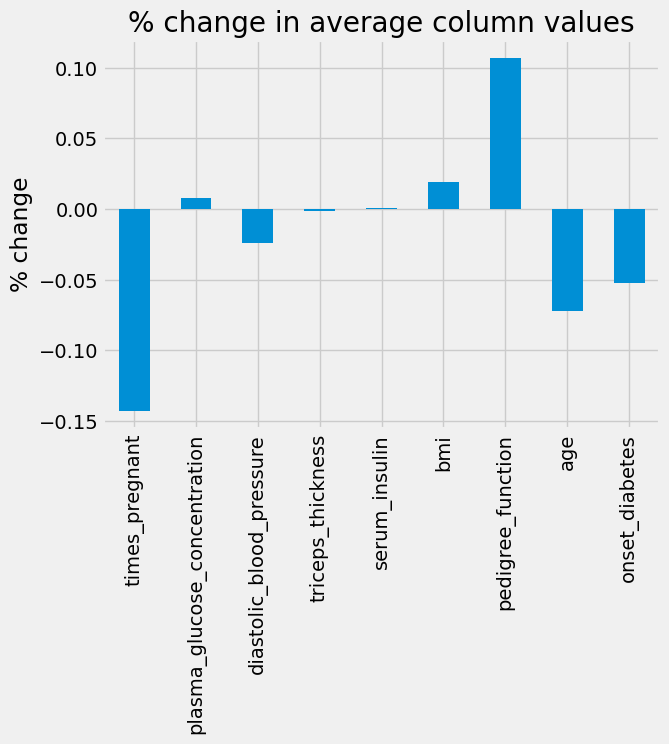

In [38]:
# % change in means as a bar chart
ax = ((pima_dropped.mean() - pima.mean()) / pima.mean()).plot(kind='bar', title='% change in average column values')
ax.set_ylabel('% change')
# The pedigree_fucntion average rose 11% after dropping missing values, which is a big increase,
# while the number of times pregnant dropped 14%.
# We can see how dropping values severely affects the shape of the data and we should try to retain as much as possible.